Explore the data thoroughly, uncovering key patterns and insights that can inform race strategies. For each team and driver, analyze the following and support your findings with relevant visuals:

**Total Number of Pit Stops**

For each driver and team in each race of the 2024 F1 season, determine the total number of pit stops made. Identify any patterns or trends in pit stop frequency.

**Tire Compounds Used During the Race**

Identify the tire compounds used by each driver in every race. Create visualizations to compare the tire compound strategies across different teams and drivers.

**Number of Laps Completed on Each Tire Compound**:
Analyze the number of laps completed by each driver on each tire compound during their stints. Use visuals to illustrate the relationship between stint length and tire compound usage.

**Average Lap Time per Stint and Delta Time per Tire Compound**
Calculate the average lap time for each stint. Visualize the changes in lap times within each stint to understand how tire performance evolved over the course of a race.

**Time Spent in Pits**

Measure the total time spent in the pits by each driver during the races. Create visual representations to show how pit time varies across drivers and teams.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
folder_path = '/content/drive/MyDrive/formula-1'
os.chdir(folder_path)

Mounted at /content/drive


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import os
import warnings
warnings.filterwarnings("ignore")


In [ ]:
black = '\033[30m'
red = '\033[31m'
green = '\033[32m'
yellow = '\033[33m'
blue = '\033[34m'
magenta = '\033[35m'
cyan = '\033[36m'
white = '\033[37m'
orange = "\033[38;5;208m"
bold = '\033[1m'
reset = '\033[0m'


In [ ]:
colors = {
    "Bold Red": "#FF0000",
    "Bold Green": "#00FF00",
    "Bold Blue": "#0000FF",
    "Bold Yellow": "#FFFF00",
    "Bold Cyan": "#00FFFF",
    "Bold Magenta": "#FF00FF",
    "Bold Orange": "#FFA500",
    "Bold Purple": "#800080",
    "Bold Pink": "#FFC0CB",
    "Bold Brown": "#A52A2A",
    "Bold Grey": "#808080",
    "Bold Black": "#000000",
      "Bold Neon Green": "#39FF14",
    "Bold Neon Pink": "#FF6EC7",
    "Bold Neon Blue": "#1B03A3",
    "Bold Neon Yellow": "#FFFF33",
    "Bold Neon Orange": "#FF5F1F",
    "Bold Dark Red": "#8B0000",
    "Bold Dark Green": "#006400",
    "Bold Dark Blue": "#00008B",
    "Bold Dark Orange": "#FF8C00",
    "Bold Dark Purple": "#4B0082",
    "Bold Dark Pink": "#FF1493",
    "Bold Dark Brown": "#654321",
    "Bold Dark Grey": "#A9A9A9",

   "Bold Light Blue": "#87CEEB",
    "Bold Light Green": "#B2FF66",
    "Bold Light Cyan": "#AFEEEE",
    "Bold Light Magenta": "#E6A8D7",
    "Bold Light Orange": "#FFDAB9",
    "Bold Light Purple": "#D8BFD8",
    "Bold Light Brown": "#D2B48C",
    "Bold Light Pink": "#FF69B4",
    "Bold Light Yellow": "#FFFACD",

}

In [ ]:
def convert_to_timedelta(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_timedelta(df[col])
    return df

def conver_to_datetime(df , columns_name):
    for col in columns_name:
        df[col] = pd.to_datetime(df[col])
    return df

def conver_deltatime_to_second (df , columns_name):
    for col in columns_name:
        df[f'{col}_in_sec'] = df[col].dt.total_seconds()
    return df

In [ ]:
lap_2024 = pd.read_csv('ocean_data_challenge_F1_data/races_2024/lap_2024.csv')
lap_sing = pd.read_csv('ocean_data_challenge_F1_data/singapore_grand_prix_races_2018-2019-2022-2023/lap_singapore_grand_prix_2018-2019-2022-2023.csv')
lap_merged =  pd.concat([lap_sing, lap_2024], ignore_index=True, sort=False)
lap_merged['EventName'].fillna('Singapore Grand Prix', inplace=True)
deltaTime_cols = ['Time', 'LapTime', 'Sector1Time', 'Sector2Time', 'Sector3Time' ,
                  'Sector1SessionTime', 'Sector2SessionTime', 'Sector3SessionTime',
                  'LapStartTime', 'PitOutTime','PitInTime' ]

lap_merged= convert_to_timedelta(lap_merged , deltaTime_cols)

lap_merged = conver_deltatime_to_second (lap_merged , deltaTime_cols)

### **Total Number of Pit Stops**

For each driver and team in each race of the 2024 F1 season, determine the total number of pit stops made. Identify any patterns or trends in pit stop frequency.

In [ ]:

print(f'{orange}{bold} lap_merged : {reset} {lap_merged.shape} ')

for col in lap_merged.columns:
    print(f'{bold}{col} : {reset} |nnull: {yellow}{lap_merged[col].isnull().sum()} {reset} |nunique: {green}{lap_merged[col].nunique()} {reset} | {red}{lap_merged[col].dtype} {reset}|{blue}{list (lap_merged[col].head(5))} {reset} ' )

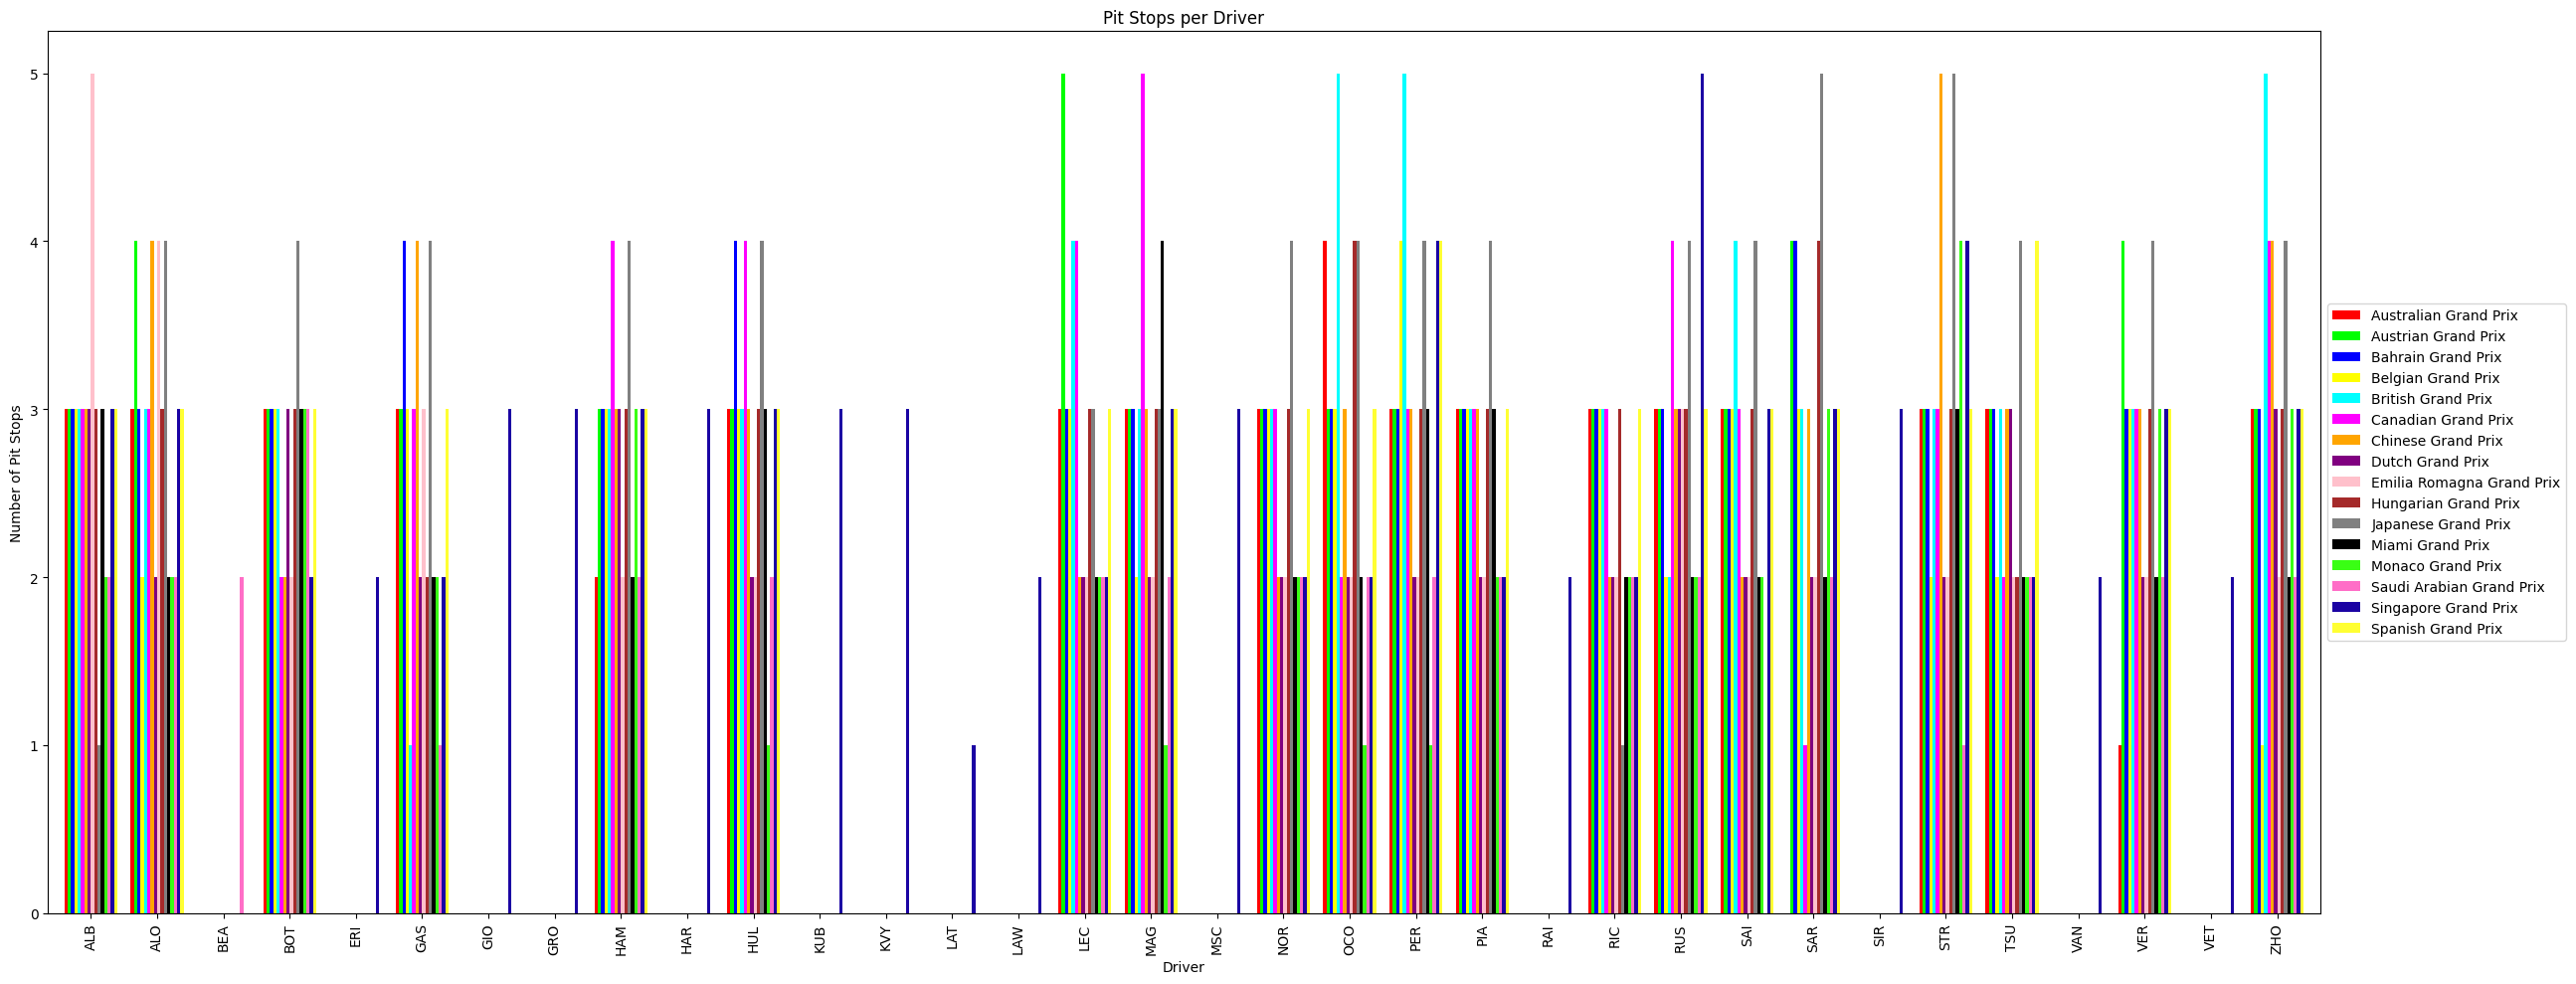

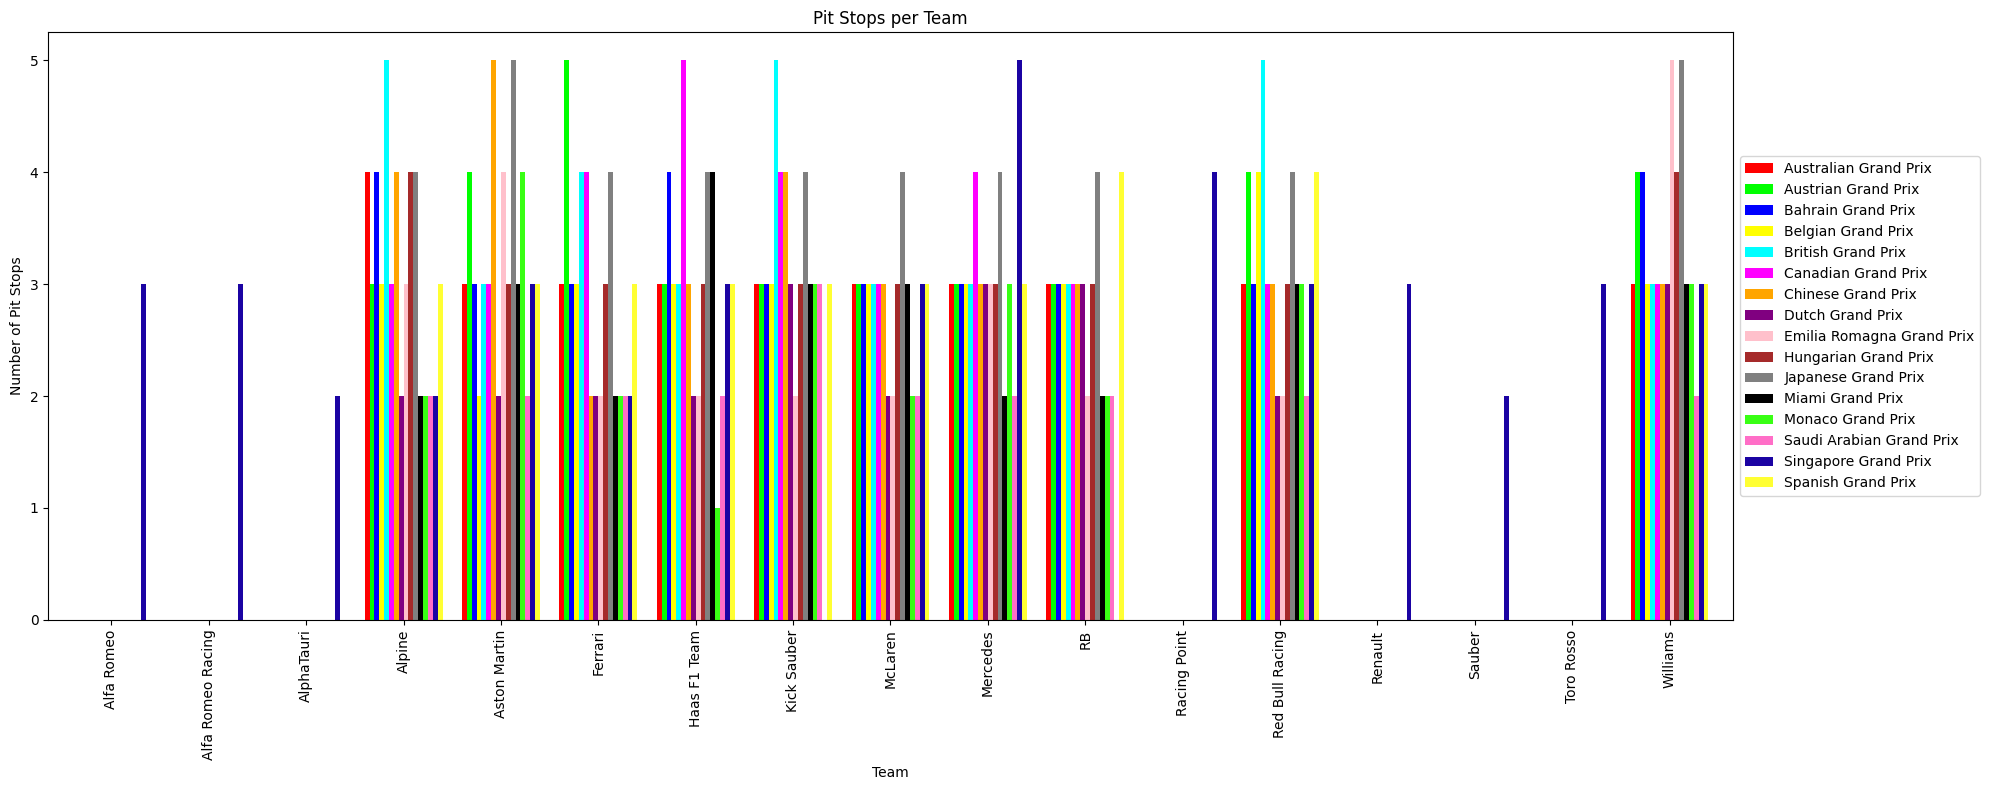

In [ ]:
driver_pit_stops = lap_merged.groupby(['Driver', 'EventName'])['Stint'].nunique()
team_pit_stops = lap_merged.groupby(['Team', 'EventName'])['Stint'].nunique()


ax1 = driver_pit_stops.unstack().plot(kind='bar', figsize=(26, 10), width=0.8, color=list(colors.values()))
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pit Stops per Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Pit Stops')
plt.tight_layout()
plt.show()

ax2 = team_pit_stops.unstack().plot(kind='bar', figsize=(20, 8), width=0.8, color=list(colors.values()))
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pit Stops per Team')
plt.xlabel('Team')
plt.ylabel('Number of Pit Stops')
plt.tight_layout()
plt.show()


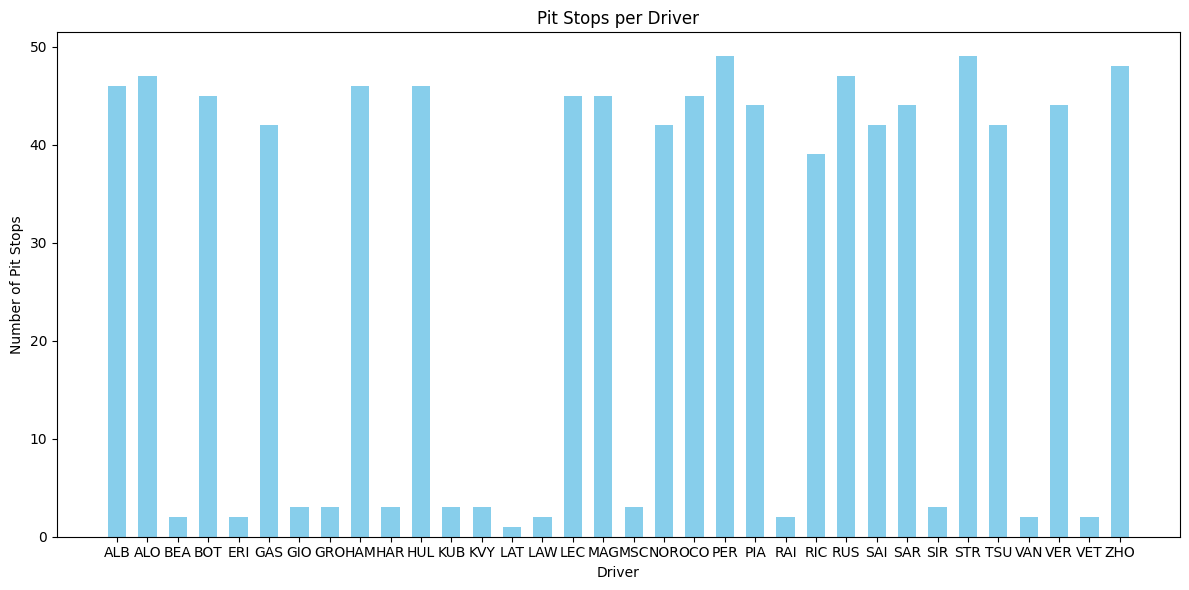

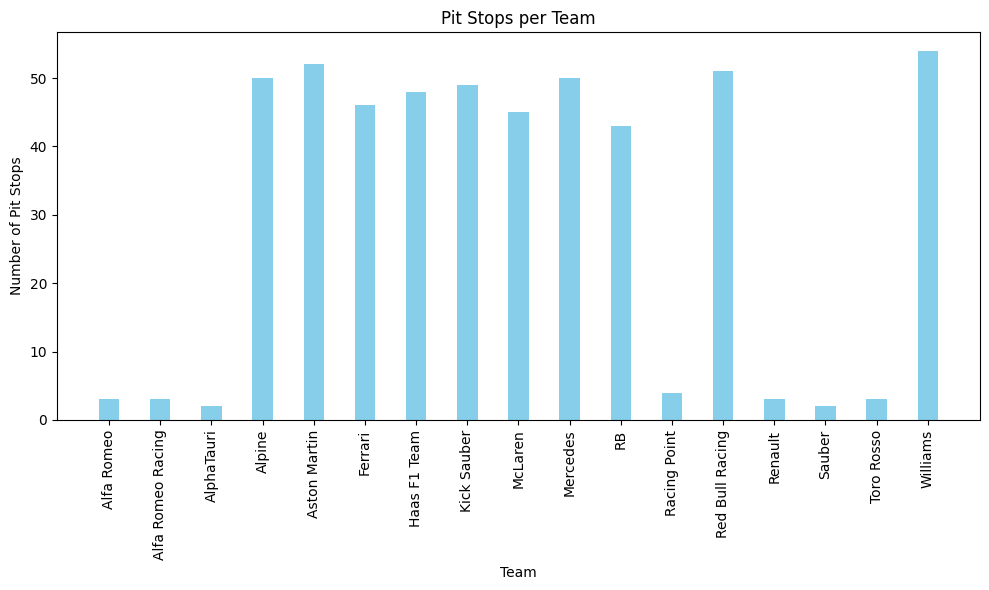

In [ ]:
driver_pit_stops = lap_merged.groupby(['Driver', 'EventName'])['Stint'].nunique().reset_index()
driver_pit_stops = driver_pit_stops.groupby(['Driver'])['Stint'].sum().reset_index()

team_pit_stops = lap_merged.groupby(['Team', 'EventName'])['Stint'].nunique().reset_index()
team_pit_stops = team_pit_stops.groupby(['Team'])['Stint'].sum().reset_index()

# # ------------------------------- bar plot --------------------
plt.figure(figsize=(12, 6))
plt.bar(driver_pit_stops['Driver'], driver_pit_stops['Stint'] , label=driver_pit_stops['Driver'],  width=0.6 , color='skyblue')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pit Stops per Driver')
plt.xlabel('Driver')
plt.ylabel('Number of Pit Stops')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 6))
plt.bar(team_pit_stops['Team'], team_pit_stops['Stint'] , label=team_pit_stops['Team'],  width=0.4 , color='skyblue')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title('Pit Stops per Team')
plt.xlabel('Team')
plt.xticks(rotation=90)
plt.ylabel('Number of Pit Stops')
plt.tight_layout()
plt.show()

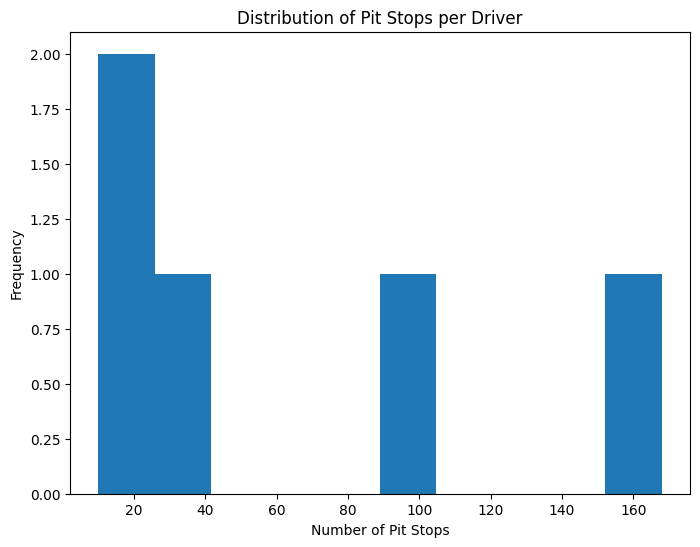

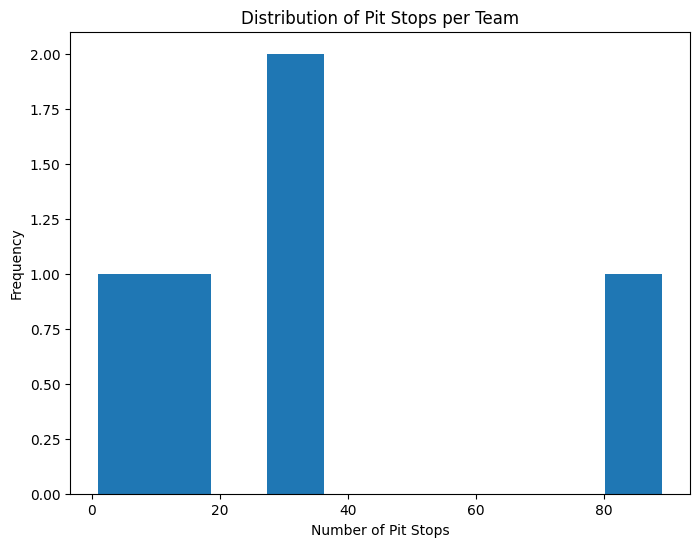

In [ ]:
driver_pit_stops.value_counts().plot(kind='hist', bins=10, figsize=(8, 6))
plt.title('Distribution of Pit Stops per Driver')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Frequency')
plt.show()

team_pit_stops.value_counts().plot(kind='hist', bins=10, figsize=(8, 6))
plt.title('Distribution of Pit Stops per Team')
plt.xlabel('Number of Pit Stops')
plt.ylabel('Frequency')
plt.show()

### **Tire Compounds Used During the Race**


Identify the tire compounds used by each driver in every race. Create visualizations to compare the tire compound strategies across different teams and drivers.

In [ ]:
grouped_df

,Driver,EventName,Compound
0,ALB,Australian Grand Prix,HARD
0,ALB,Australian Grand Prix,MEDIUM
1,ALB,Austrian Grand Prix,HARD
1,ALB,Austrian Grand Prix,MEDIUM
2,ALB,Bahrain Grand Prix,HARD
...,...,...,...
330,ZHO,Singapore Grand Prix,HARD
330,ZHO,Singapore Grand Prix,SOFT
331,ZHO,Spanish Grand Prix,MEDIUM
331,ZHO,Spanish Grand Prix,HARD


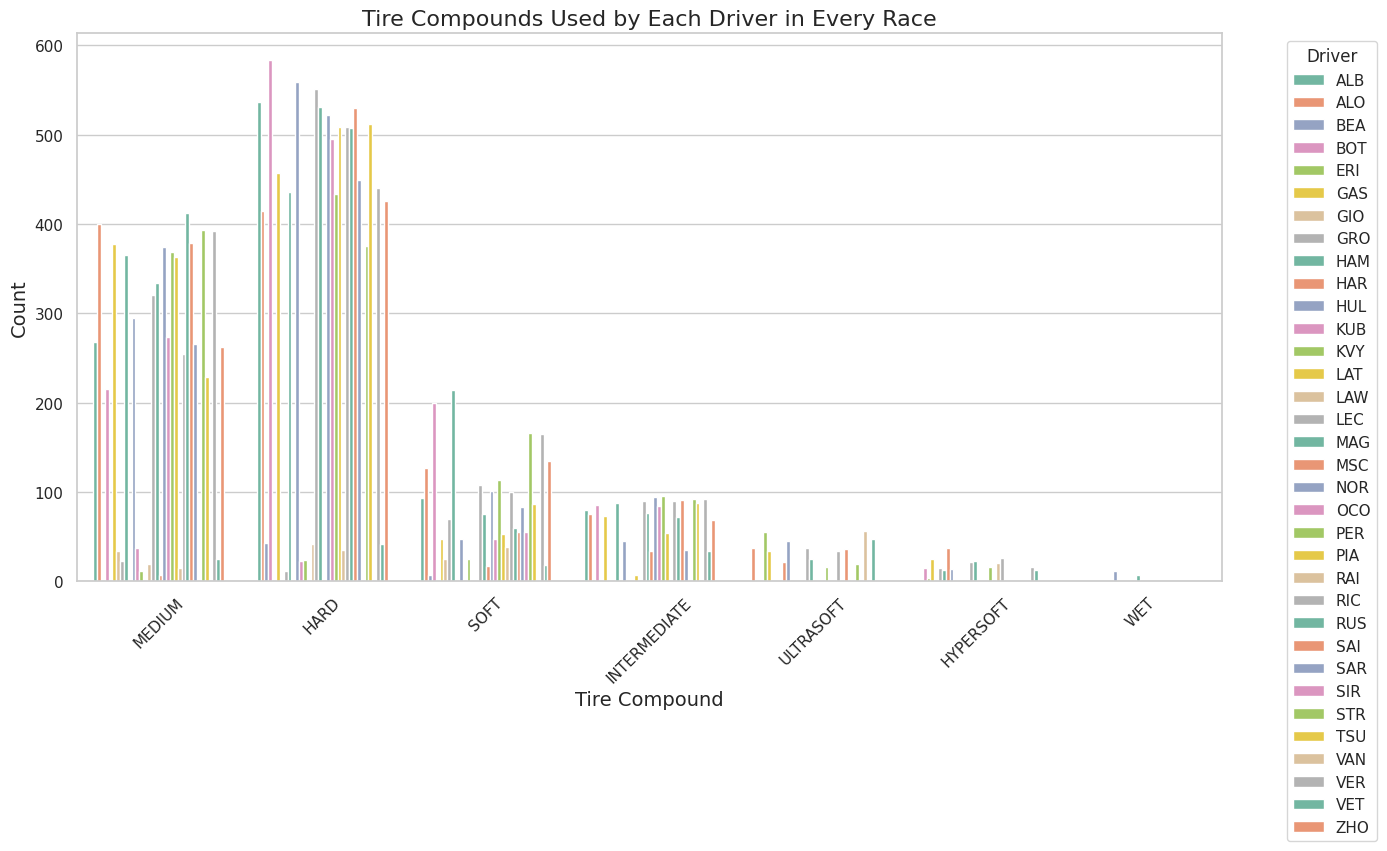

<Figure size 1400x800 with 0 Axes>

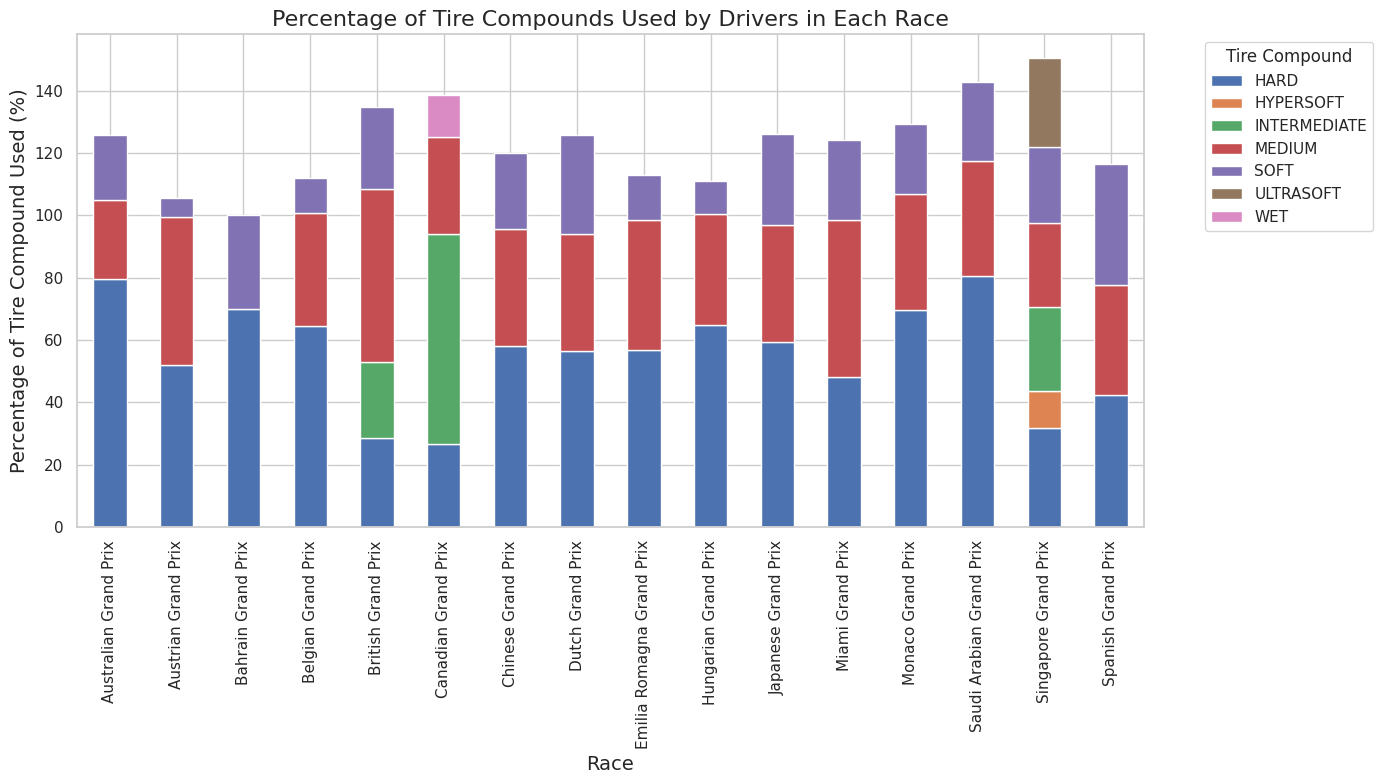

In [ ]:
# based on data 2024
grouped_df = lap_merged.groupby(['Driver', 'EventName', 'Stint']).agg({'Compound': lambda x: list(x)}).reset_index()
grouped_df2 = grouped_df.groupby(['Driver', 'EventName']).agg({'Compound': lambda x : sum(x, [])}).reset_index()
# grouped_df['Compound'].apply(lambda x: len(x))
grouped_df2 = grouped_df2.explode('Compound')

sns.set(style="whitegrid")

# Create a count plot for tire compounds used by each driver
plt.figure(figsize=(14, 8))
sns.countplot(data=grouped_df2, x='Compound', hue='Driver', palette='Set2')
plt.title('Tire Compounds Used by Each Driver in Every Race', fontsize=16)
plt.xlabel('Tire Compound', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ===================================================
compound_counts = grouped_df2.groupby(['EventName', 'Driver', 'Compound']).size().reset_index(name='Count')

# Calculate total counts for each driver in each race
total_counts = compound_counts.groupby(['EventName', 'Driver'])['Count'].sum().reset_index(name='Total')

# Merge to get the percentage
merged = pd.merge(compound_counts, total_counts, on=['EventName', 'Driver'])
merged['Percentage'] = (merged['Count'] / merged['Total']) * 100

pivot_table = merged.pivot_table(index='EventName', columns='Compound', values='Percentage', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Percentage of Tire Compounds Used by Drivers in Each Race', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Percentage of Tire Compound Used (%)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Tire Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

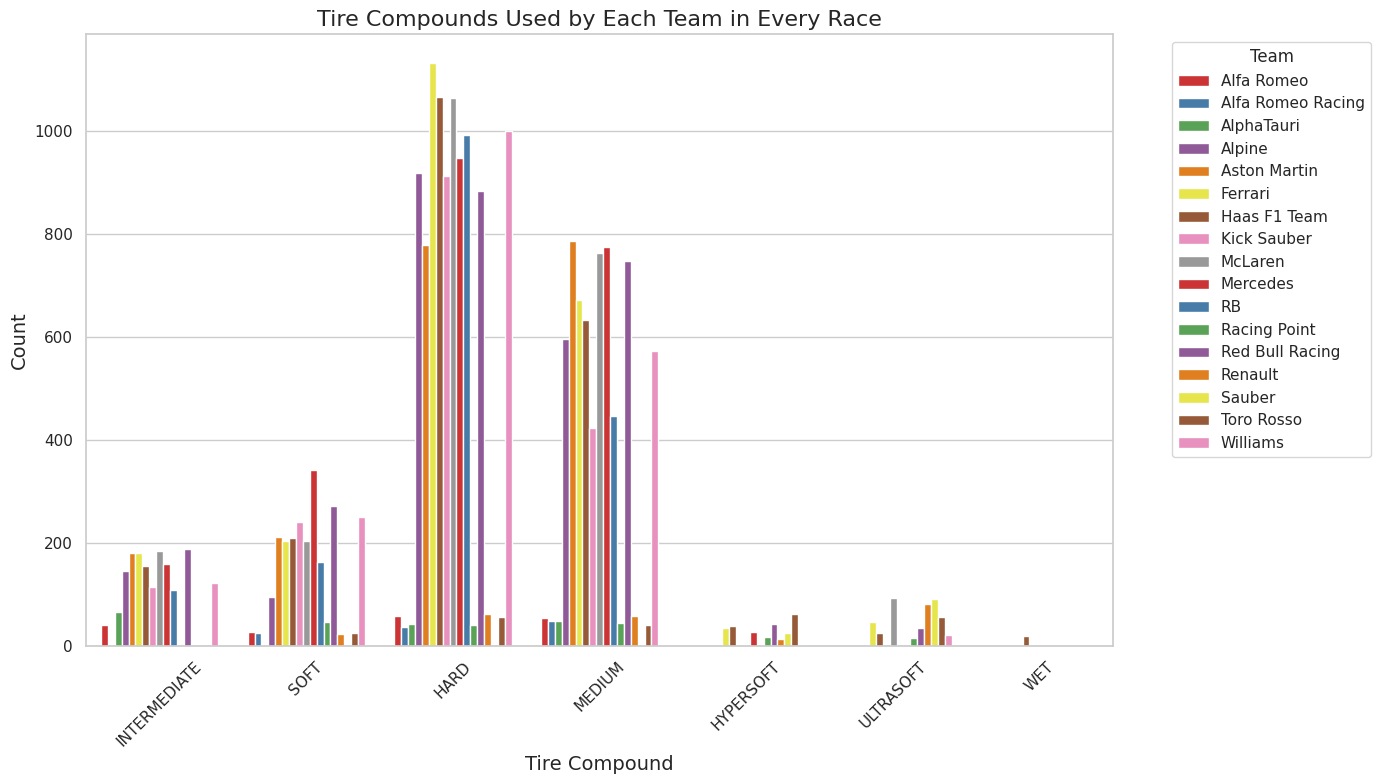

<Figure size 1400x800 with 0 Axes>

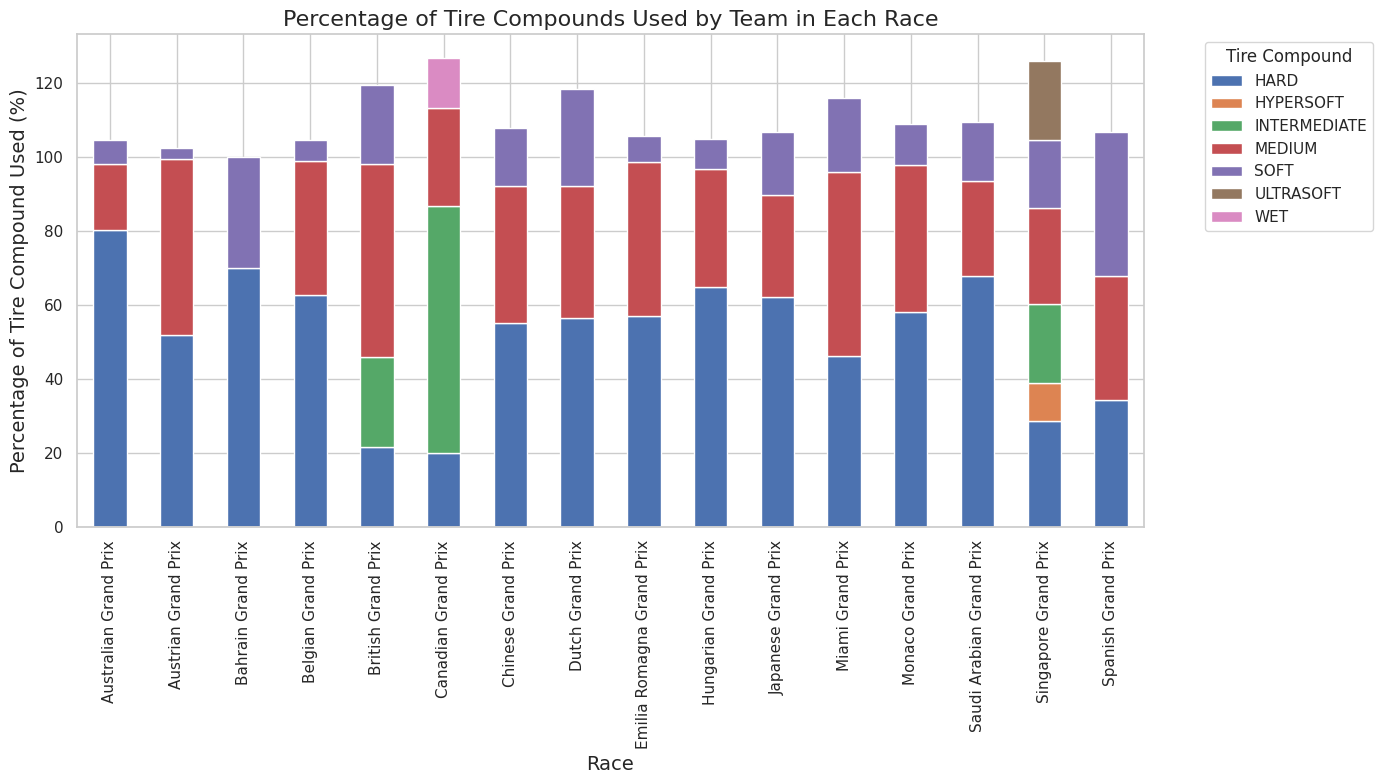

In [ ]:
# based on data 2024
grouped_df = lap_merged.groupby(['Team', 'EventName', 'Stint']).agg({'Compound': lambda x: list(x)}).reset_index()
grouped_df2 = grouped_df.groupby(['Team', 'EventName']).agg({'Compound': lambda x : sum(x, [])}).reset_index()
# grouped_df['Compound'].apply(lambda x: len(x))
grouped_df2 = grouped_df2.explode('Compound')

plt.figure(figsize=(14, 8))
sns.countplot(data=grouped_df2, x='Compound', hue='Team', palette='Set1')
plt.title('Tire Compounds Used by Each Team in Every Race', fontsize=16)
plt.xlabel('Tire Compound', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.legend(title='Team', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
# ===================================================
compound_counts = grouped_df2.groupby(['EventName', 'Team', 'Compound']).size().reset_index(name='Count')

# Calculate total counts for each driver in each race
total_counts = compound_counts.groupby(['EventName', 'Team'])['Count'].sum().reset_index(name='Total')

# Merge to get the percentage
merged = pd.merge(compound_counts, total_counts, on=['EventName', 'Team'])
merged['Percentage'] = (merged['Count'] / merged['Total']) * 100

pivot_table = merged.pivot_table(index='EventName', columns='Compound', values='Percentage', fill_value=0)

# Plotting the stacked bar chart
plt.figure(figsize=(14, 8))
pivot_table.plot(kind='bar', stacked=True, figsize=(14, 8))

plt.title('Percentage of Tire Compounds Used by Team in Each Race', fontsize=16)
plt.xlabel('Race', fontsize=14)
plt.ylabel('Percentage of Tire Compound Used (%)', fontsize=14)
plt.xticks(rotation=90)
plt.legend(title='Tire Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### **Number of Laps Completed on Each Tire Compound**

 Analyze the number of laps completed by each driver on each tire compound during their stints. Use visuals to illustrate the relationship between stint length and tire compound usage.

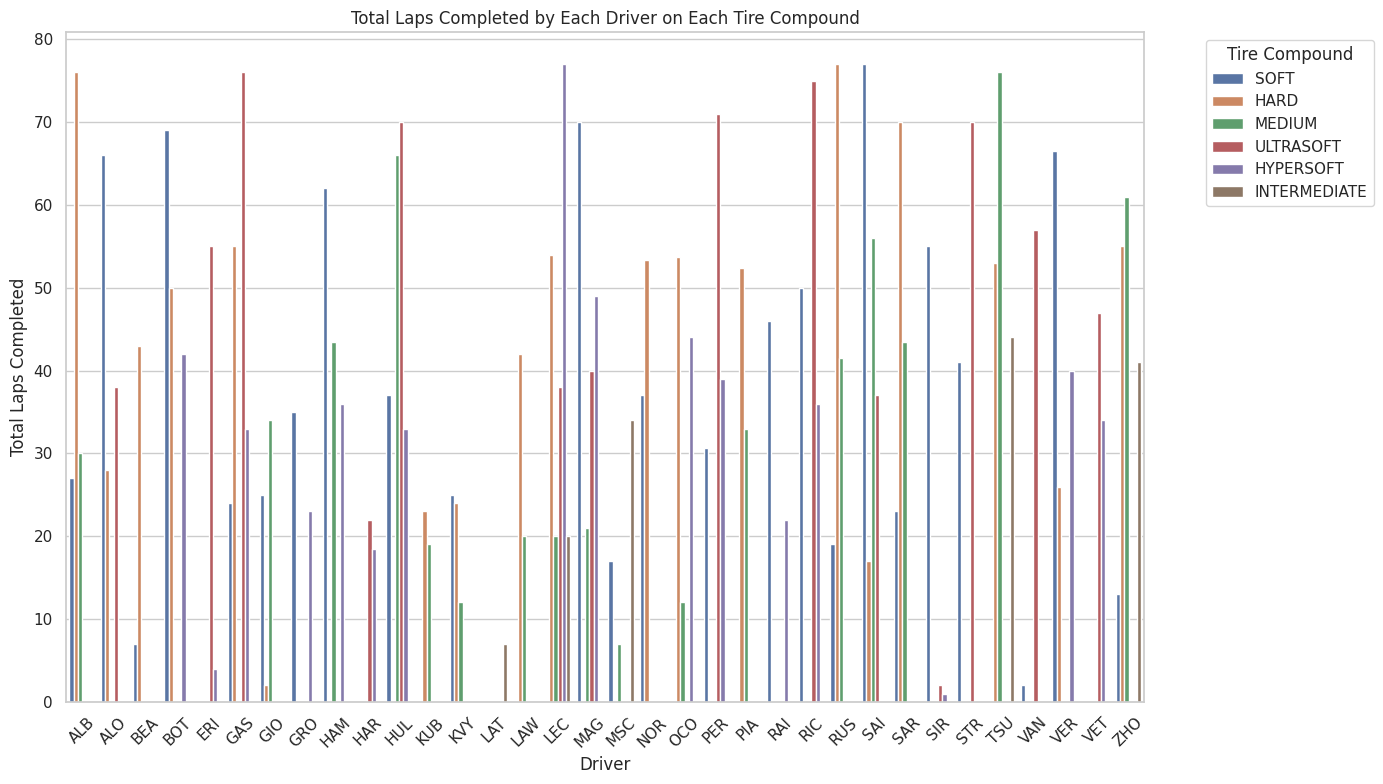

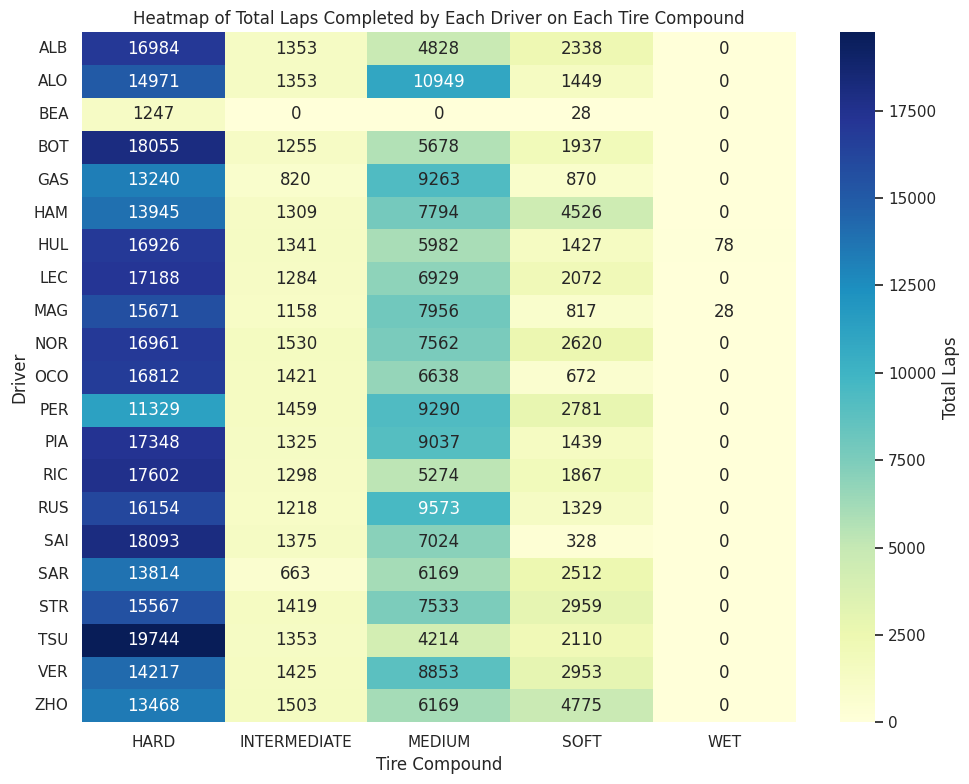

In [ ]:

# ------------------------ driver based -------------------------


df = lap_merged.groupby(['Driver', 'Stint']).agg({
    'Compound': 'first',
    'LapNumber': lambda x: len(list(set(x))),
    'LapTime_in_sec':'sum',


}).reset_index()


df.rename(columns={'LapNumber': 'TotalLaps'}, inplace=True)
df.rename(columns={'LapTime_in_sec': 'Stint_Time'}, inplace=True)


sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=df, x='Driver', y='TotalLaps', hue='Compound', ci=None)

plt.title('Total Laps Completed by Each Driver on Each Tire Compound')
plt.xlabel('Driver')
plt.ylabel('Total Laps Completed')
plt.xticks(rotation=45)
plt.legend(title='Tire Compound', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# -----------------------
heatmap_data = lap_counts.pivot_table(index='Driver', columns='Compound', values='TotalLaps', fill_value=0)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Total Laps'})

plt.title('Heatmap of Total Laps Completed by Each Driver on Each Tire Compound')
plt.xlabel('Tire Compound')
plt.ylabel('Driver')
plt.tight_layout()
plt.show()


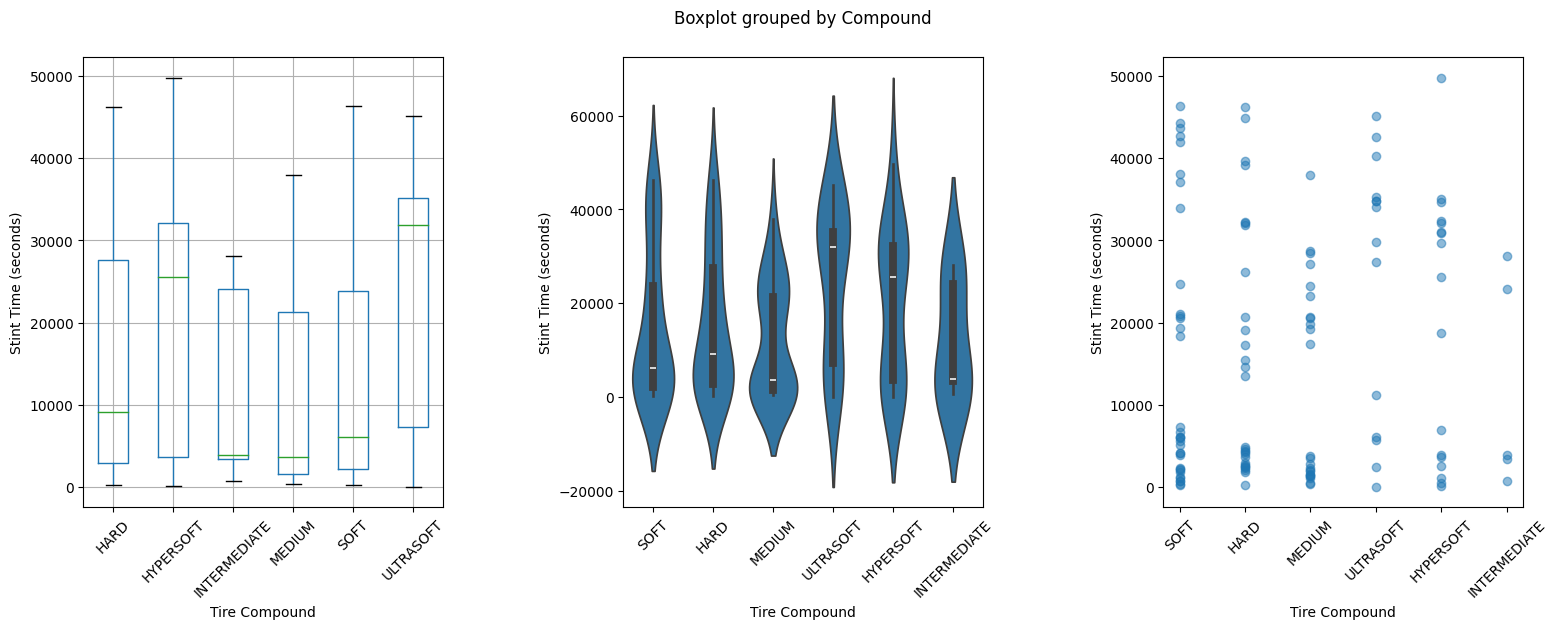

In [ ]:

df = lap_merged.groupby(['Driver', 'Stint']).agg({
    'Compound': 'first',
    'LapNumber': lambda x: len(list(set(x))),
    'LapTime_in_sec':'sum',

}).reset_index()
df.rename(columns={'LapNumber': 'TotalLaps'}, inplace=True)
df.rename(columns={'LapTime_in_sec': 'Stint_Time'}, inplace=True)

# -------------------------Sting length & compound -----------------------------

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))
df.boxplot(column='Stint_Time', by='Compound', ax=ax1)
ax1.set_xlabel('Tire Compound')
ax1.set_ylabel('Stint Time (seconds)')
ax1.set_title('')
ax1.tick_params(axis='x', rotation=45)

sns.violinplot(x='Compound', y='Stint_Time', data=df, ax=ax2)
ax2.set_xlabel('Tire Compound')
ax2.set_ylabel('Stint Time (seconds)')
ax2.set_title('')
ax2.tick_params(axis='x', rotation=45)

ax3.scatter(df['Compound'], df['Stint_Time'], alpha=0.5)
ax3.set_xlabel('Tire Compound')
ax3.set_ylabel('Stint Time (seconds)')
ax3.set_title('')
ax3.tick_params(axis='x', rotation=45)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5)
# Display the figure
plt.show()

### **Average Lap Time per Stint and Delta Time per Tire Compound**
Calculate the average lap time for each stint. Visualize the changes in lap times within each stint to understand how tire performance evolved over the course of a race.

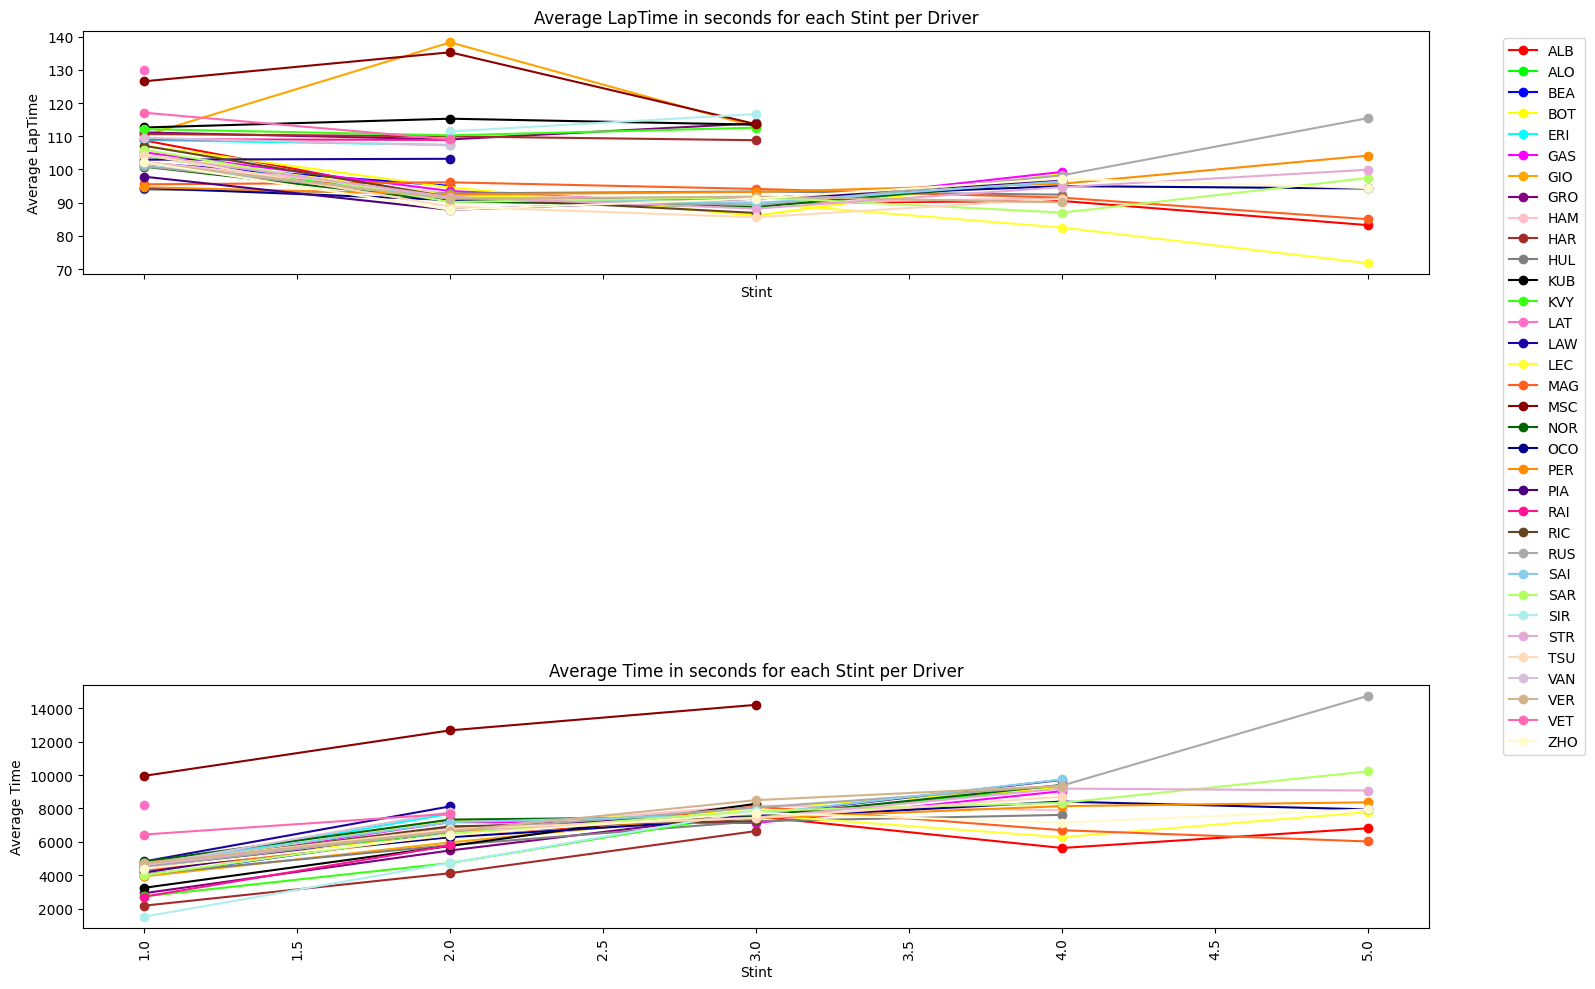

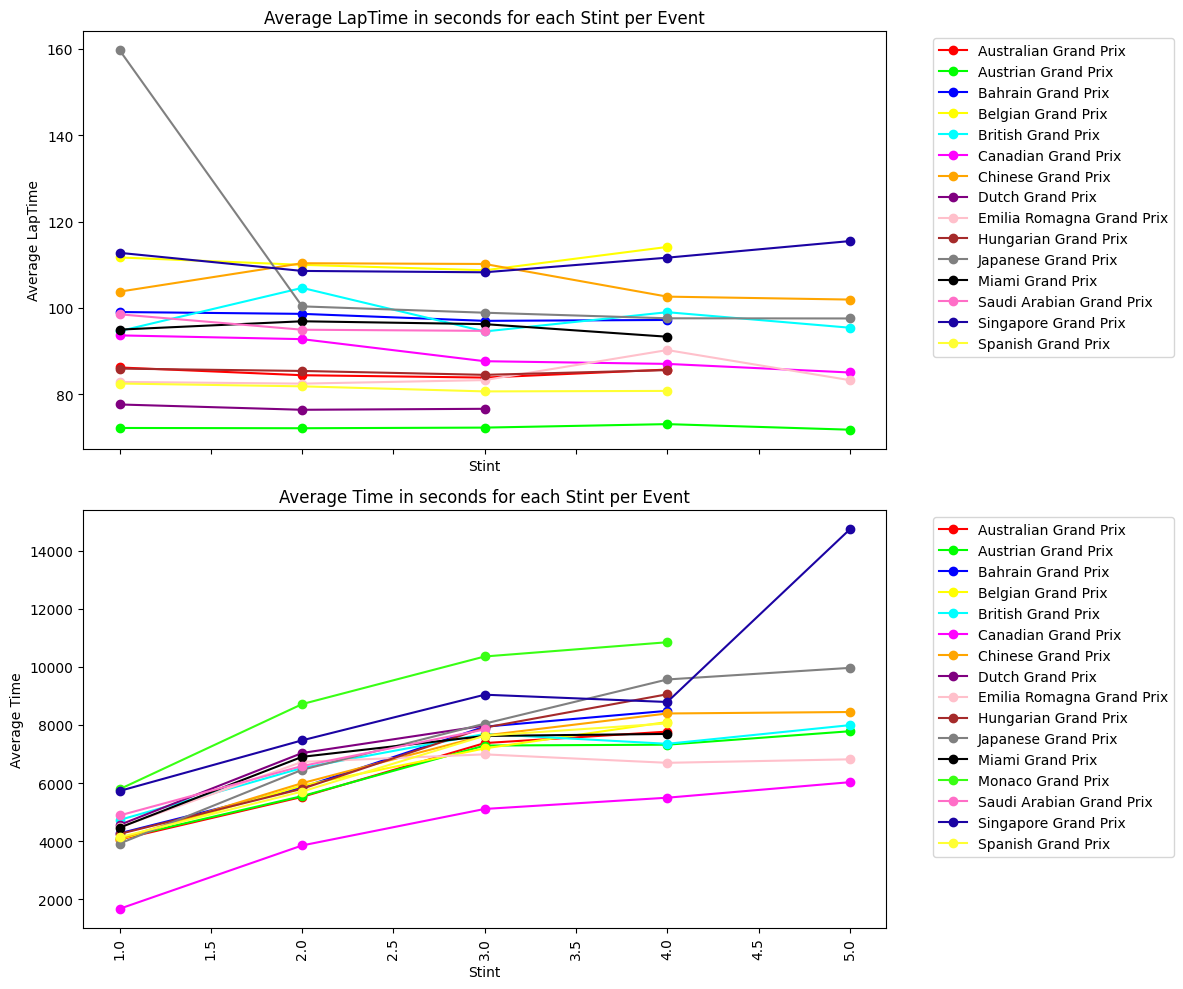

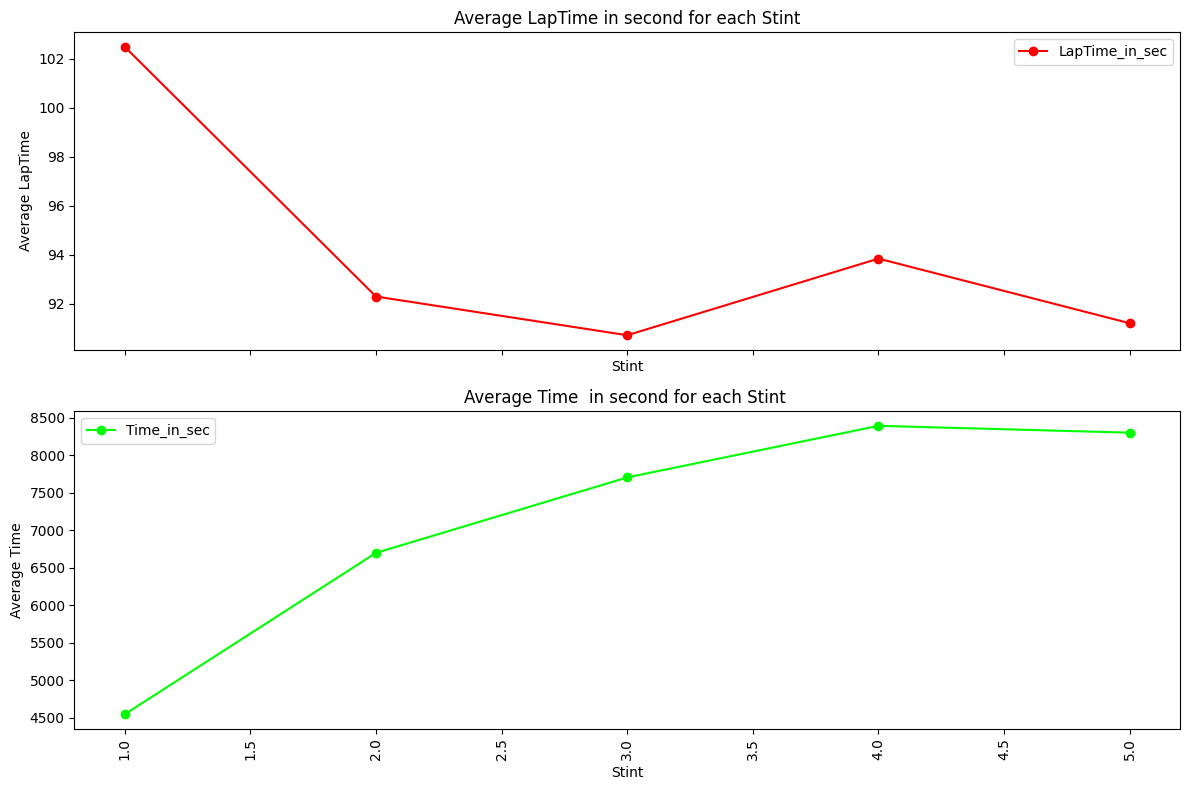

In [ ]:

# -----------------------------------per driver---------------------------------
grouped_df = lap_merged.groupby(['Driver', 'Stint']).agg({
    'LapTime_in_sec': 'mean',
    'Time_in_sec' : 'mean',
    'Compound': 'first'
     }).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)

# Plotting LapTime_in_sec for each EventName
for i, Driver in enumerate(grouped_df['Driver'].unique()):
    event_data = grouped_df[grouped_df['Driver'] == Driver]
    ax1.plot(event_data['Stint'], event_data['LapTime_in_sec'], marker='o', label=Driver, color=list(colors.values())[i] )
ax1.set_ylabel('Average LapTime')
ax1.set_title('Average LapTime in seconds for each Stint per Driver')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xlabel('Stint')

# Plotting Time_in_sec for each EventName
for i, Driver in enumerate(grouped_df['Driver'].unique()):
    event_data = grouped_df[grouped_df['Driver'] == Driver]
    ax2.plot(event_data['Stint'], event_data['Time_in_sec'], marker='o', label=Driver, color=list(colors.values())[i] )

ax2.set_xlabel('Stint')
ax2.set_ylabel('Average Time')
ax2.tick_params(axis='x', rotation=90)
# ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_title('Average Time in seconds for each Stint per Driver')

plt.tight_layout()
plt.show()
# ---------------------------------per event -----------------------------------
grouped_df = lap_merged.groupby(['EventName', 'Stint']).agg({
    'LapTime_in_sec': 'mean',
    'Time_in_sec' : 'mean'
     }).reset_index()

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Plotting LapTime_in_sec for each EventName
for i, event in enumerate(grouped_df['EventName'].unique()):
  if event != 'Monaco Grand Prix':
    event_data = grouped_df[grouped_df['EventName'] == event]
    ax1.plot(event_data['Stint'], event_data['LapTime_in_sec'], marker='o', label=event, color=list(colors.values())[i] )
ax1.set_ylabel('Average LapTime')
ax1.set_title('Average LapTime in seconds for each Stint per Event')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax1.set_xlabel('Stint')

# Plotting Time_in_sec for each EventName
for i, event in enumerate(grouped_df['EventName'].unique()):
    event_data = grouped_df[grouped_df['EventName'] == event]
    ax2.plot(event_data['Stint'], event_data['Time_in_sec'], marker='o', label=event, color=list(colors.values())[i] )

ax2.set_xlabel('Stint')
ax2.set_ylabel('Average Time')
ax2.tick_params(axis='x', rotation=90)
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax2.set_title('Average Time in seconds for each Stint per Event')

plt.tight_layout()
plt.show()
# ================

degradation_rates = []
for event, event_df in grouped_df.groupby('EventName'):
    for stint, stint_df in event_df.groupby('Stint'):
        first_lap = stint_df['LapTime_in_sec'].iloc[0]
        last_lap = stint_df['LapTime_in_sec'].iloc[-1]
        degradation = last_lap - first_lap
        degradation_rates.append((event, stint, degradation))

degradation_df = pd.DataFrame(degradation_rates, columns=['Event', 'Stint', 'Degradation'])
# ---------------------------------all events ----------------------------------

grouped_df = lap_merged.groupby([ 'Stint']).agg({
     'LapTime_in_sec': 'mean',
     'Time_in_sec' : 'mean'
     }).reset_index()


fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

ax1.plot(grouped_df['Stint'], grouped_df['LapTime_in_sec'], marker='o', label='LapTime_in_sec', color=list(colors.values())[0])
ax1.set_ylabel('Average LapTime')
ax1.set_title('Average LapTime in second for each Stint')
ax1.legend()
ax1.set_xlabel('Stint')

ax2.plot(grouped_df['Stint'], grouped_df['Time_in_sec'], marker='o', label='Time_in_sec', color=list(colors.values())[1])
ax2.set_xlabel('Stint')
ax2.set_ylabel('Average Time')
ax2.tick_params(axis='x', rotation=90)
ax2.legend()
ax2.set_title('Average Time  in second for each Stint ')

plt.tight_layout()
plt.show()


### **Time Spent in Pits**

Measure the total time spent in the pits by each driver during the races. Create visual representations to show how pit time varies across drivers and teams.

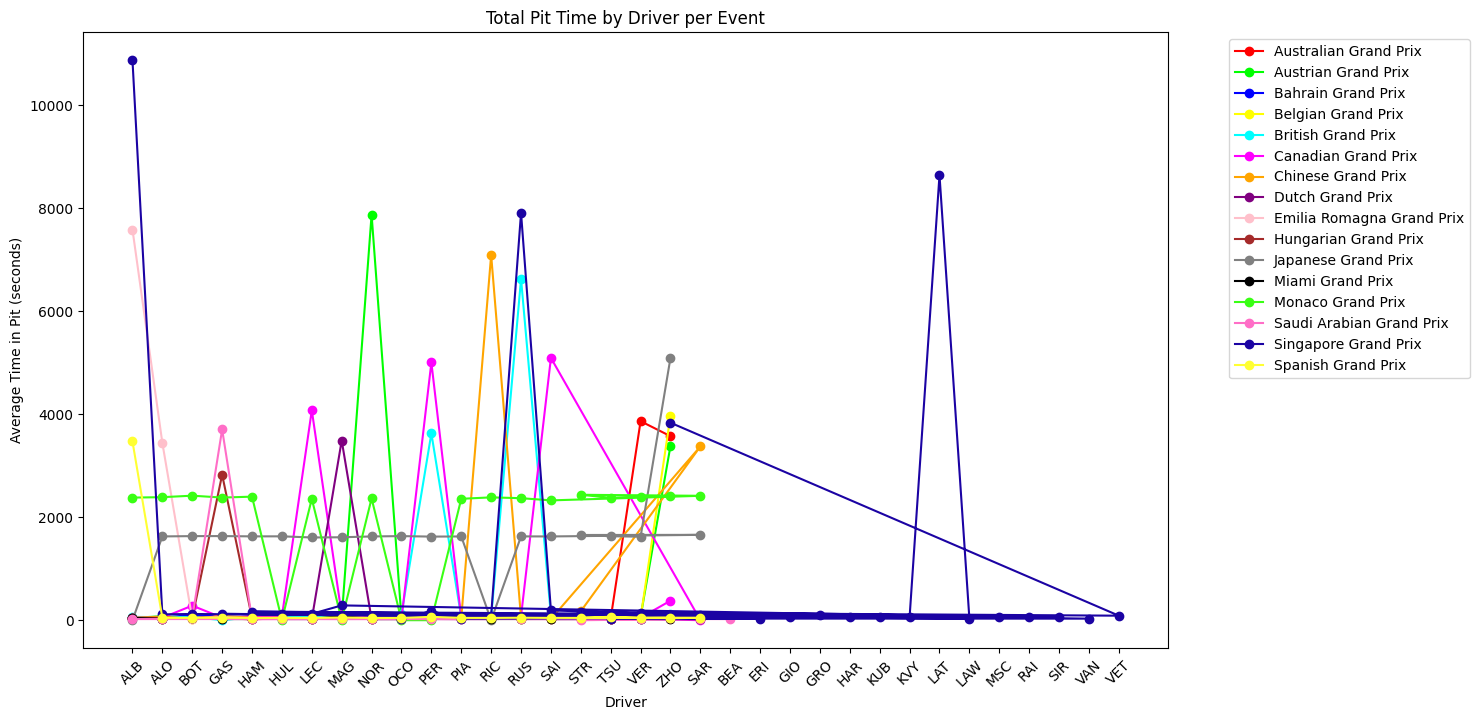

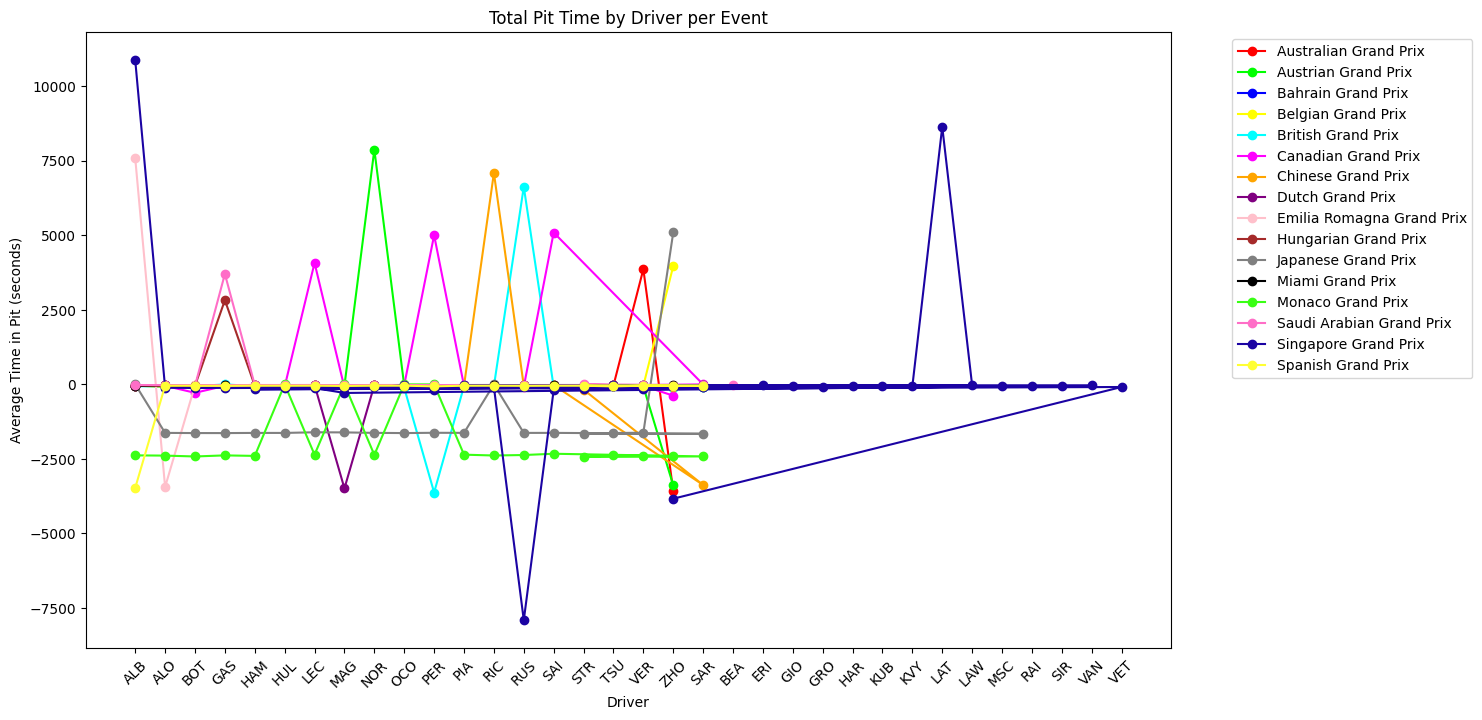

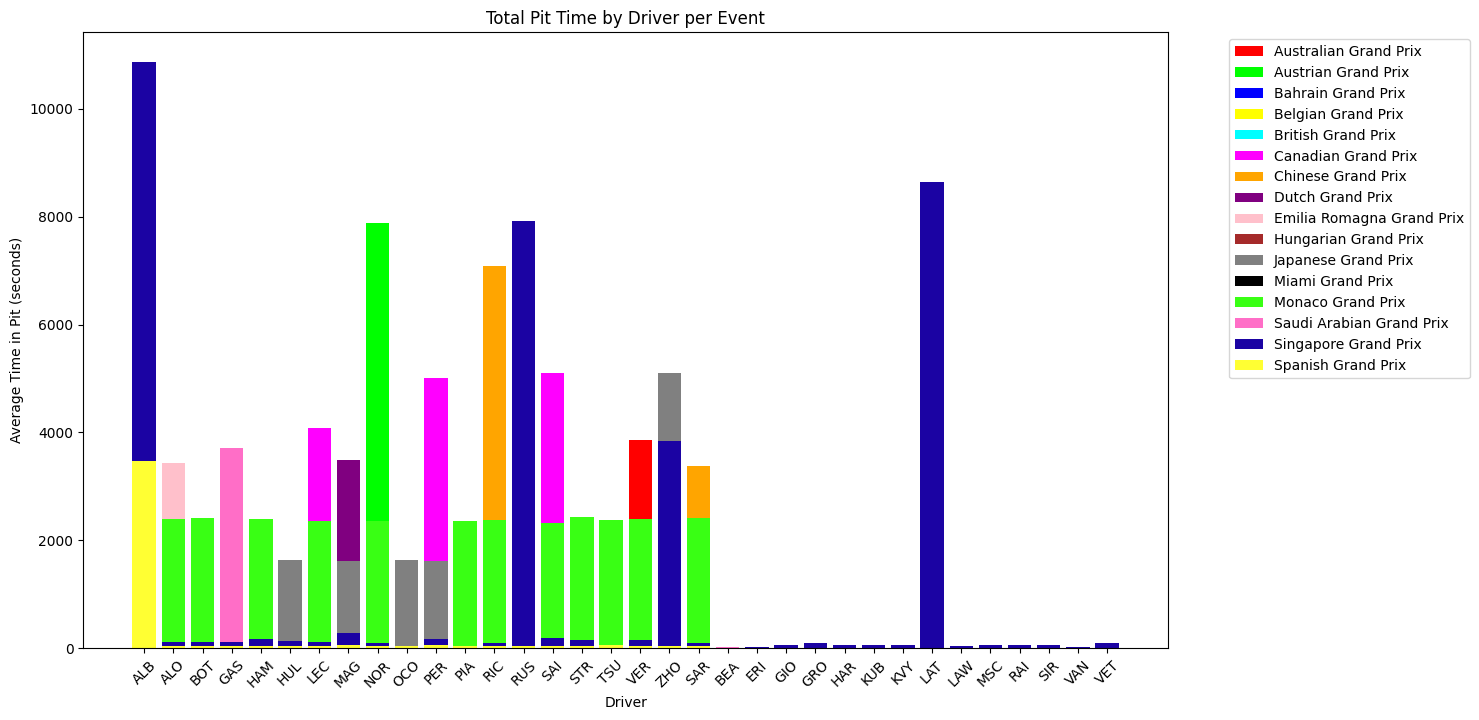

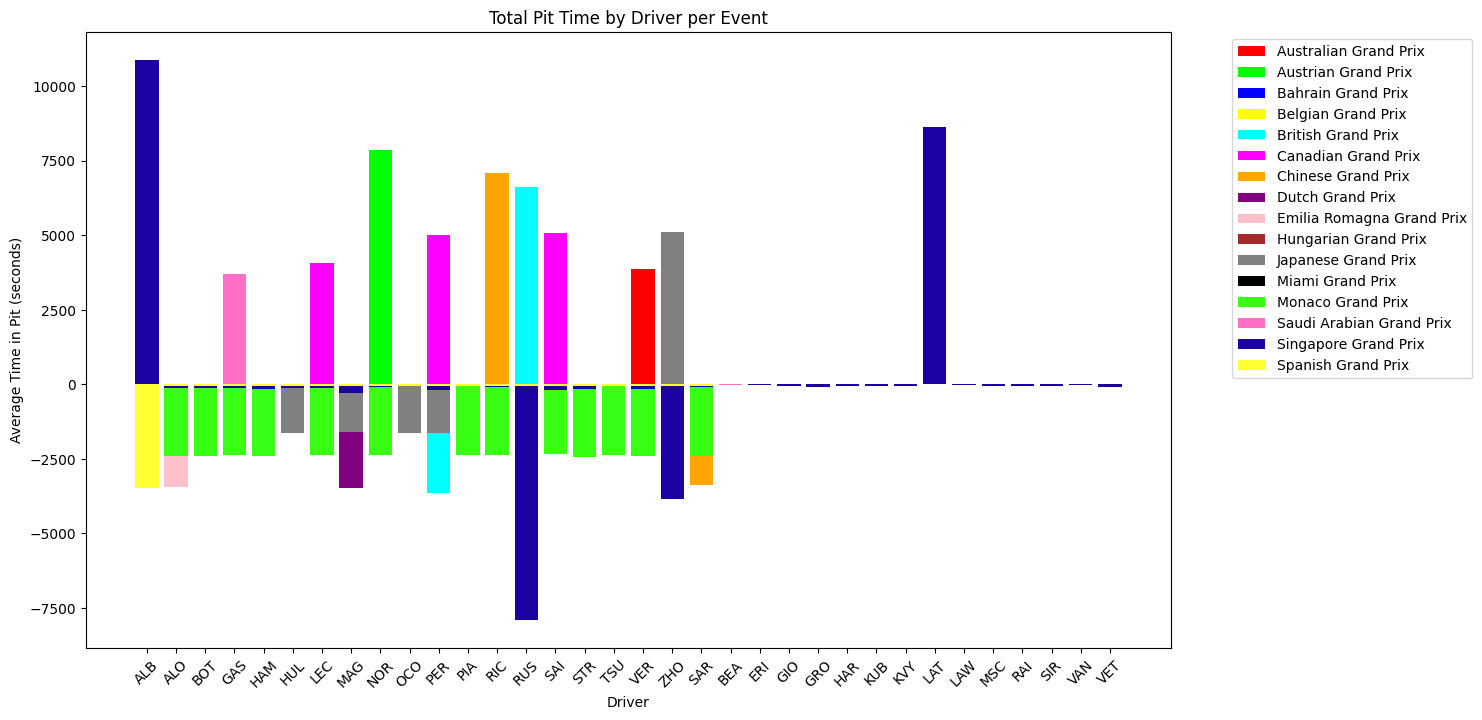

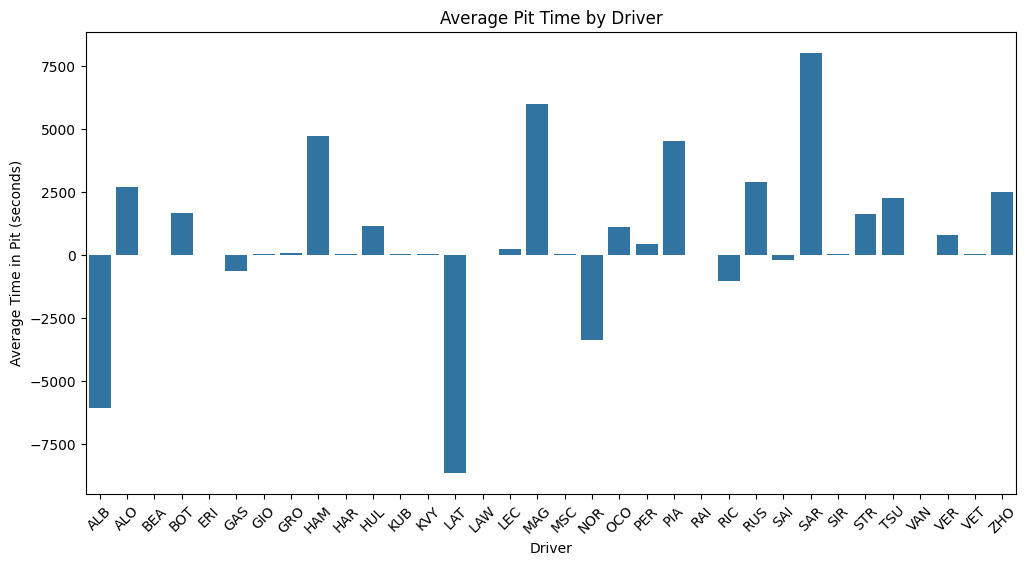

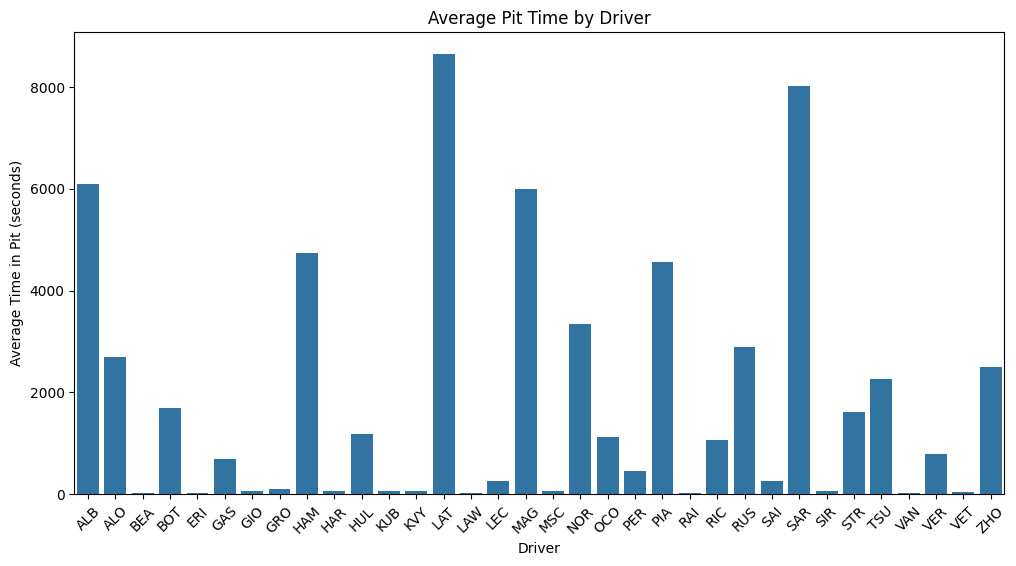

In [ ]:
df = lap_merged.groupby(['Driver', 'EventName']).agg({
    'PitOutTime_in_sec' : 'sum',
    'PitInTime_in_sec' : 'sum',
    'Stint': lambda x: len(np.unique(x)),
}).reset_index()

df ['Time_in_Pit_abs'] = np.abs(df['PitInTime_in_sec'] - df['PitOutTime_in_sec'])
df ['Time_in_Pit'] = (df['PitInTime_in_sec'] - df['PitOutTime_in_sec'])


# --------------------------bar --------------------------------------
plt.figure(figsize=(14, 8))
for i, event in enumerate(df['EventName'].unique()):
    data = df[df['EventName'] ==event]
    plt.plot(data['Driver'], data['Time_in_Pit_abs'], marker='o', label=event, color=list(colors.values())[i] )
plt.title('Total Pit Time by Driver per Event')
plt.xlabel('Driver')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()
plt.figure(figsize=(14, 8))
for i, event in enumerate(df['EventName'].unique()):
    data = df[df['EventName'] ==event]
    plt.plot(data['Driver'], data['Time_in_Pit'], marker='o', label=event, color=list(colors.values())[i] )
plt.title('Total Pit Time by Driver per Event')
plt.xlabel('Driver')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
for i, event in enumerate(df['EventName'].unique()):
    data = df[df['EventName'] == event]
    plt.bar(data['Driver'], data['Time_in_Pit_abs'], label=event, color=list(colors.values())[i])
plt.title('Total Pit Time by Driver per Event')
plt.xlabel('Driver')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(14, 8))
for i, event in enumerate(df['EventName'].unique()):
    data = df[df['EventName'] == event]
    plt.bar(data['Driver'], data['Time_in_Pit'], label=event, color=list(colors.values())[i])
plt.title('Total Pit Time by Driver per Event')
plt.xlabel('Driver')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()
# --------------------------total events ----------------------------------



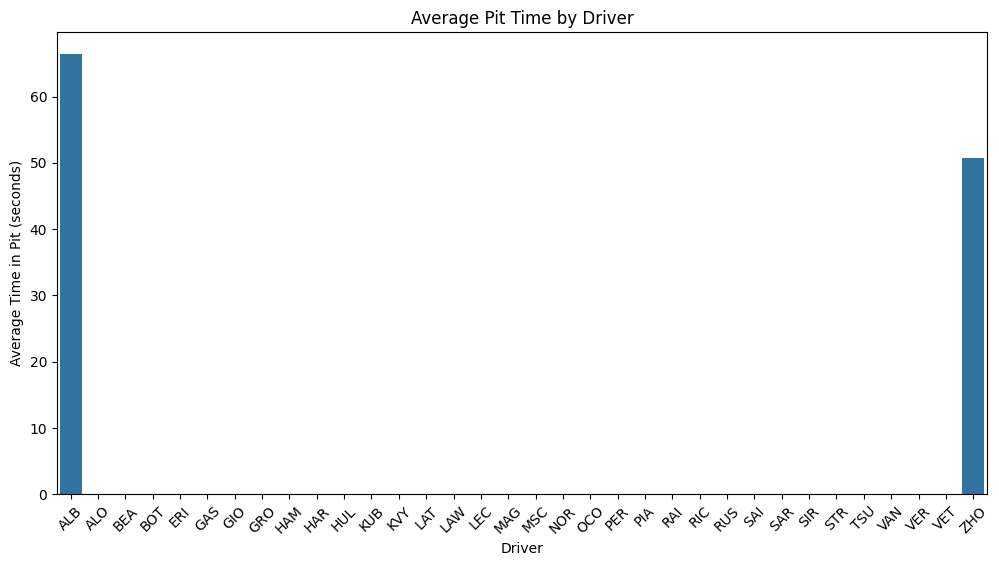

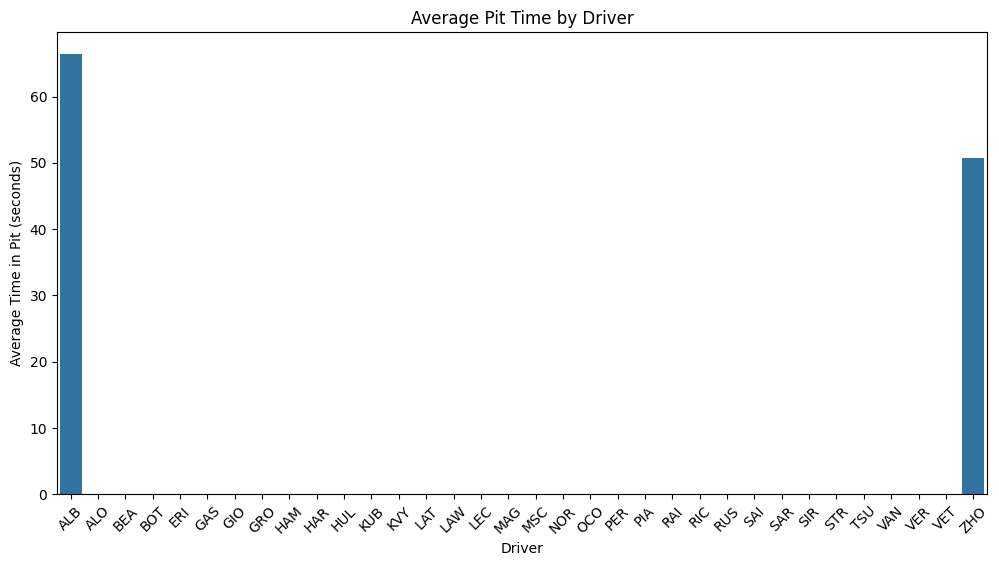

In [ ]:

lap_merged ['Time_in_Pit_abs'] = np.abs(lap_merged['PitInTime_in_sec'] - lap_merged['PitOutTime_in_sec'])
lap_merged ['Time_in_Pit'] = (lap_merged['PitInTime_in_sec'] - lap_merged['PitOutTime_in_sec'])


# df ['Time_in_Pit_abs'] = np.abs(df['PitInTime_in_sec'] - df['PitOutTime_in_sec'])
# df ['Time_in_Pit'] = (df['PitInTime_in_sec'] - df['PitOutTime_in_sec'])
df = lap_merged.groupby(['Driver', 'Team']).agg({
    'Time_in_Pit_abs' : 'sum',
    'Time_in_Pit' : 'sum',
    'Stint': lambda x: len(np.unique(x)),
}).reset_index()

# --------------------------bar --------------------------------------
avg_pit_time = df.groupby('Driver')['Time_in_Pit'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver', y='Time_in_Pit', data=avg_pit_time)
plt.title('Average Pit Time by Driver')
plt.xlabel('Driver')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()

avg_pit_time = df.groupby('Driver')['Time_in_Pit_abs'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(x='Driver', y='Time_in_Pit_abs', data=avg_pit_time)
plt.title('Average Pit Time by Driver')
plt.xlabel('Driver')
plt.ylabel('Average Time in Pit (seconds)')
plt.xticks(rotation=45)
plt.show()
